# hw02

## 1. 计算1^2+2^2+......+10^2

In [1]:
s = 0
for i in range(10):
    s += (i+1)**2
s

385

## 2. 一个期限为两年的项目，初始投资为2000美元，预期在第1年年末产生800美元收益，第2年年末产生1600收益投资，计算该项目的内部收益率IRR

In [2]:
import numpy as np

In [3]:
np.irr([-2000, 800, 1600])

0.11651513899116828

## 3. 某人贷款20000元购买汽车，年利率为6%，他需要在5年内进行每月的分期付款，问他每个月需要支付多少钱 

In [4]:
np.pmt(0.06/12, 5*12, 20000)

-386.6560305885654

# hw03

## 对数据集d-aapl0305.txt绘制折线图与蜡烛图 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.finance as mpf
%matplotlib inline

In [22]:
quotes = pd.read_csv('d-aapl0305.txt', sep='\s')

C:\Users\ian\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [23]:
quotes.head()

,Open,High,Low,Close,Volumn,AdjClose
0,14.80,14.93,14.59,14.90,5266200,7.42
1,15.03,15.38,14.88,14.90,13947600,7.42
2,14.79,15.00,14.47,14.85,12226600,7.39
3,14.58,14.71,14.44,14.55,8201600,7.24
4,14.62,14.92,14.50,14.68,7687600,7.31


## 折线图

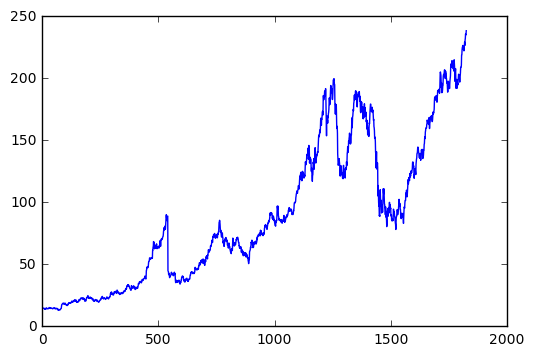

In [24]:
plt.plot(quotes['Close'])

## 蜡烛图

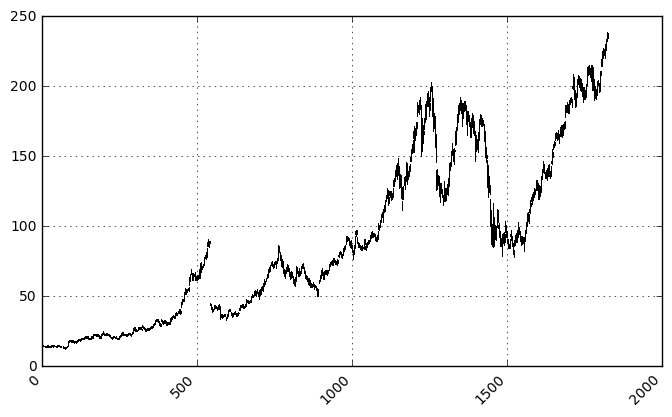

In [25]:
fig, ax = plt.subplots(figsize=(8, 5)) #设置图片大小
fig.subplots_adjust(bottom=0.2)
mpf.candlestick2_ochl(ax, opens=quotes["Open"].values, closes=quotes["Close"].values,
                 highs=quotes["High"].values, lows=quotes["Low"].values, width=0.6, colorup='b', colordown='r')
plt.grid(True)
# ax.xaxis.set_major_formatter(ticker.FuncFormatter(mydate_formatter))
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()




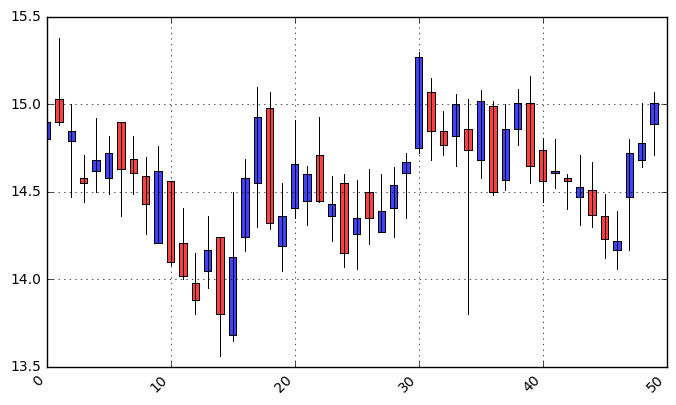

In [26]:
quotes = quotes.iloc[:50]
fig, ax = plt.subplots(figsize=(8, 5)) #设置图片大小
fig.subplots_adjust(bottom=0.2)
mpf.candlestick2_ochl(ax, opens=quotes["Open"].values, closes=quotes["Close"].values,
                 highs=quotes["High"].values, lows=quotes["Low"].values, width=0.6, colorup='b', colordown='r')
plt.grid(True)
# ax.xaxis.set_major_formatter(ticker.FuncFormatter(mydate_formatter))
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()




# hw04

 获取苹果公司从2014年1月1日到今天的股票数据

为了更加切合实际，选取的是sh510300ETF近3年的数据

## 1）画出股票数据的折线图

In [7]:
import requests
import json
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)  # 设置显示数据的最大列数，防止出现省略号…，导致数据显示不全
pd.set_option('expand_frame_repr', False)  # 当列太多时不自动换行
import matplotlib.pyplot as plt
%matplotlib inline
# 支持中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

In [1]:
def get_hist_k_data(code, datalen, verbose=False, plot=False):
    r = requests.get('http://money.finance.sina.com.cn/quotes_service/api/json_v2.php/CN_MarketData.getKLineData?symbol={}&scale=240&ma=no&datalen={}'.format(code, datalen))
    rs = r.text
    cols_num = ['open', 'high', 'low', 'close']
    cols = ['day', 'volume'] + cols_num
    for c in cols:
        rs = rs.replace(c, '"{}"'.format(c))
    df1 = pd.DataFrame(json.loads(rs))
    df1.loc[:, cols_num] = df1.loc[:, cols_num].applymap(float)
    df1.loc[:, 'day'] = pd.to_datetime(df1.day)
    df1.index = df1.day
    if verbose:
        print(df1.head(2))
        print(df1.tail(2))
    if plot:
        df1.close.plot()
        
    return df1

In [2]:
code = 'sh510300'
datalen = 250*3

            close        day   high    low   open    volume
day                                                        
2017-01-11  3.386 2017-01-11  3.422  3.385  3.405  94705340
2017-01-12  3.369 2017-01-12  3.395  3.366  3.386  84000935
            close        day   high    low   open     volume
day                                                         
2020-02-12  3.971 2020-02-12  3.977   3.93  3.939  290783451
2020-02-13   3.95 2020-02-13  3.985  3.938   3.97  325961046


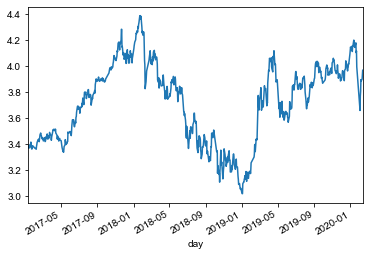

In [5]:
df = get_hist_k_data(code, datalen, True, True)

## 2）计算对数收益率



In [24]:
df['log_return'] = (df.close/df.close.shift(1)).map(np.log)

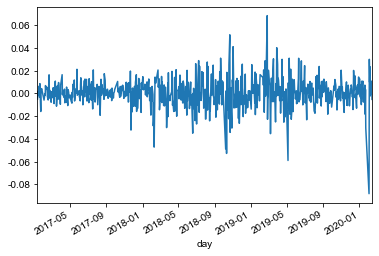

In [25]:
df.log_return.plot()

## 3）计算历史波动率

In [28]:
df['波动率'] = df.log_return.rolling(252).std()/np.sqrt(252)

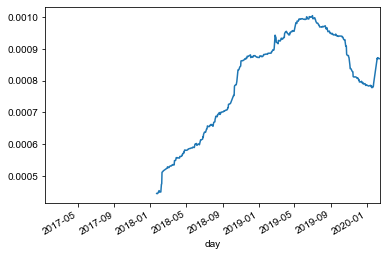

In [29]:
df.波动率.plot()

# lesson5

## hw05

### 计算以下定积分
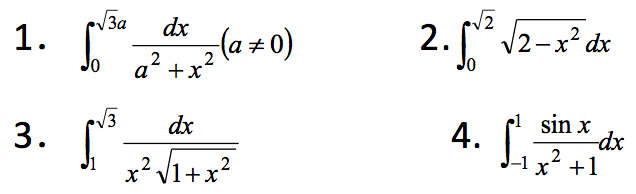

In [14]:
import sympy as sy

x = sy.Symbol('x')
a = sy.Symbol('a')

#### 1

In [54]:
f = 1/(a**2+x**2)

In [55]:
int_func = sy.integrate(f, x)
print(sy.pretty(int_func))

  ⅈ⋅log(-ⅈ⋅a + x)   ⅈ⋅log(ⅈ⋅a + x)
- ─────────────── + ──────────────
         2                2       
──────────────────────────────────
                a                 


In [56]:
Fb = int_func.subs(x, np.sqrt(3)*a).evalf()
Fa = int_func.subs(x, 0).evalf()

Fb - Fa  # exact value of integral

-(-0.5*I*log(-I*a) + 0.5*I*log(I*a))/a + (-0.5*I*log(1.73205080756888*a - I*a) + 0.5*I*log(1.73205080756888*a + I*a))/a

#### 2

In [47]:
f = sy.sqrt(2-x**2)

In [48]:
print(sy.pretty(sy.Integral(f, (x, 0, sy.sqrt(2)))))

√2                 
⌠                  
⎮     __________   
⎮    ╱    2        
⎮  ╲╱  - x  + 2  dx
⌡                  
0                  


In [49]:
int_func = sy.integrate(f, x)
print(sy.pretty(int_func))

     __________             
    ╱    2                  
x⋅╲╱  - x  + 2        ⎛√2⋅x⎞
─────────────── + asin⎜────⎟
       2              ⎝ 2  ⎠


In [50]:
Fb = int_func.subs(x, np.sqrt(2)).evalf()
Fa = int_func.subs(x, 0).evalf()

Fb - Fa  # exact value of integral

1.5707963267949 + 3.2085909082121e-9*I

#### 3

In [60]:
f = 1/(x**2*sy.sqrt(1+x**2))

In [61]:
print(sy.pretty(sy.Integral(f, (x, 1, sy.sqrt(3)))))

√3                  
⌠                   
⎮        1          
⎮  ────────────── dx
⎮        ________   
⎮   2   ╱  2        
⎮  x ⋅╲╱  x  + 1    
⌡                   
1                   


In [62]:
int_func = sy.integrate(f, x)
print(sy.pretty(int_func))

      ________
     ╱     1  
-   ╱  1 + ── 
   ╱        2 
 ╲╱        x  


In [65]:
Fb = int_func.subs(x, np.sqrt(3)).evalf()
Fa = int_func.subs(x, 1).evalf()

Fb - Fa  # exact value of integral

0.259513023993843

#### 4

In [69]:
f = sy.sin(x)/(x**2+1)

In [70]:
print(sy.pretty(sy.Integral(f, (x, -1, 1))))

1           
⌠           
⎮  sin(x)   
⎮  ────── dx
⎮   2       
⎮  x  + 1   
⌡           
-1          


In [71]:
int_func = sy.integrate(f, x)
print(sy.pretty(int_func))

⌠          
⎮ sin(x)   
⎮ ────── dx
⎮  2       
⎮ x  + 1   
⌡          


In [72]:
Fb = int_func.subs(x, 1).evalf()
Fa = int_func.subs(x, -1).evalf()

Fb - Fa  # exact value of integral

-Integral(sin(x)/(x**2 + 1), (x, -1)) + Integral(sin(x)/(x**2 + 1), (x, 1))

### 设投资者的初始资金为1000元，效用函数为$u(w)=\sqrt{w}$。现想投资两种证券A和B，证券A和证券b的现在价格分别是8元和10元。假设一年后，在状态u下，证券A的价格为15元，证券B的价格为12元；在状态d下，证券A的价格为10元，证券B的价格为15元。问两种证券应该分别购买多少，才能使得一年后的预期效用函数最大化？

# hw06

 数据集：第4周的stock_px.csv

## 1. 计算苹果公司每天的简单收益率和对数收益率


In [90]:
import statsmodels.api as sm
import scipy.stats as scs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# 支持中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

In [74]:
df = pd.read_csv('data/stock_px.csv')
df.head()

,Unnamed: 0,AAPL,MSFT,XOM,SPX
0,2003-01-02 00:00:00,7.40,21.11,29.22,909.03
1,2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2,2003-01-06 00:00:00,7.45,21.52,29.96,929.01
3,2003-01-07 00:00:00,7.43,21.93,28.95,922.93
4,2003-01-08 00:00:00,7.28,21.31,28.83,909.93


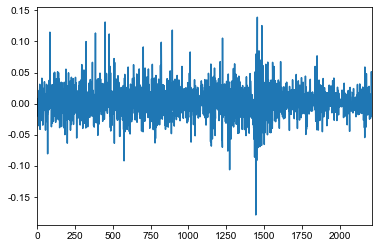

In [81]:
# 简单收益率
r_simple = (df.AAPL-df.AAPL.shift(1))/df.AAPL.shift(1)
r_simple.plot()

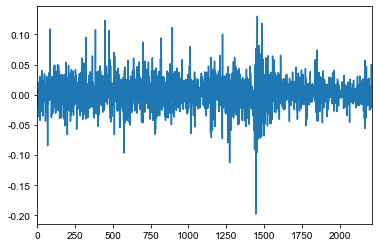

In [82]:
r_log = np.log(df.AAPL/df.AAPL.shift(1))
r_log.plot()

## 2. 检验苹果公司 两个收益率的正态性

In [96]:
def normality_tests(arr):
    ''' Tests for normality distribution of given data set.
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    print("Skew of data set  %14.3f" % scs.skew(arr))
    print("Skew test p-value %14.3f" % scs.skewtest(arr)[1])
    print("Kurt of data set  %14.3f" % scs.kurtosis(arr))
    print("Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1])
    print("Norm test p-value %14.3f" % scs.normaltest(arr)[1])
    

In [97]:
normality_tests(r_simple.dropna().values)

Skew of data set           0.195
Skew test p-value          0.000
Kurt of data set           3.968
Kurt test p-value          0.000
Norm test p-value          0.000


Text(0, 0.5, 'sample quantiles')

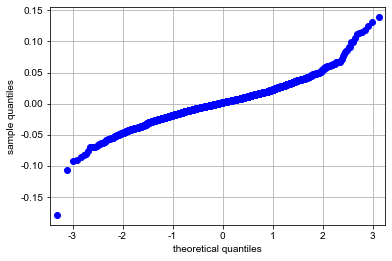

In [87]:
#正态性检验
sm.qqplot(r_simple, line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

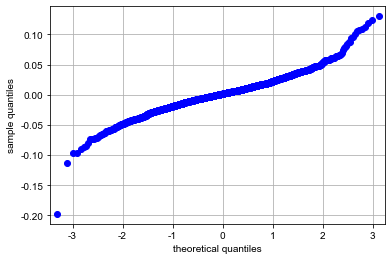

In [86]:
#正态性检验
sm.qqplot(r_log, line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

In [95]:

normality_tests(r_log.dropna().values)

Skew of data set          -0.028
Skew test p-value          0.584
Kurt of data set           4.285
Kurt test p-value          0.000
Norm test p-value          0.000


In [94]:
r_log.dropna().values

array([ 0.00673403,  0.        , -0.00268817, ...,  0.00473533,
        0.01539593,  0.03268477])

## 3. 检验苹果公司股价和对数股价的正态性 

In [99]:
df['AAPL_log'] = np.log(df.AAPL)

In [100]:
normality_tests(df.AAPL.values)

Skew of data set           0.891
Skew test p-value          0.000
Kurt of data set          -0.202
Kurt test p-value          0.036
Norm test p-value          0.000


In [101]:
normality_tests(df['AAPL_log'].values)

Skew of data set          -0.566
Skew test p-value          0.000
Kurt of data set          -0.796
Kurt test p-value          0.000
Norm test p-value          0.000


# lesson07

In [2]:
!pip install pandas_datareader

In [5]:
#数据
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

In [10]:
data = pd.read_csv('data/stock_px.csv', index_col=0)

In [11]:
data.head()

,AAPL,MSFT,XOM,SPX
2003-01-02 00:00:00,7.40,21.11,29.22,909.03
2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2003-01-06 00:00:00,7.45,21.52,29.96,929.01
2003-01-07 00:00:00,7.43,21.93,28.95,922.93
2003-01-08 00:00:00,7.28,21.31,28.83,909.93


In [12]:
symbols = data.columns.tolist()
noa = len(symbols)

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


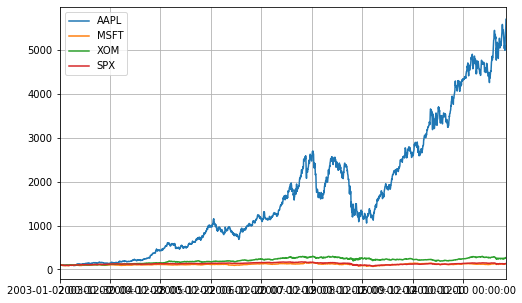

In [13]:
(data / data.ix[0] * 100).plot(figsize=(8, 5), grid=True)

In [14]:
rets = np.log(data / data.shift(1))

In [16]:
rets.mean() * 252  # 年化收益

AAPL    0.460447
MSFT    0.029156
XOM     0.111967
SPX     0.033931
dtype: float64

In [17]:
rets.cov() * 252  # 协方差

,AAPL,MSFT,XOM,SPX
AAPL,0.150288,0.048609,0.039699,0.047065
MSFT,0.048609,0.078788,0.039356,0.042821
XOM,0.039699,0.039356,0.070137,0.043358
SPX,0.047065,0.042821,0.043358,0.045852


## 随机初始化组合权重

In [18]:
#基本理论
weights = np.random.random(noa)
weights /= np.sum(weights)

weights

array([0.4241986 , 0.32889275, 0.00314559, 0.24376306])

In [19]:
np.sum(rets.mean() * weights) * 252  # 组合年化收益

0.2135333745618022

In [20]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))  # 组合年化方差

0.06870799065387012

In [21]:
np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))  # 组合年化标准差

0.26212209112142787

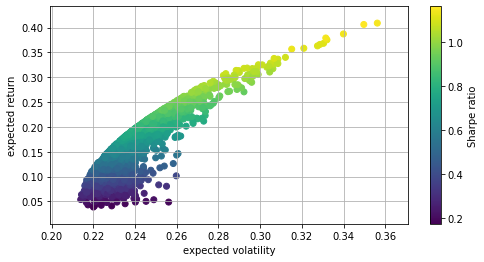

In [22]:
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, 
                        np.dot(rets.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets, c=prets / pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [23]:
#投资组合优化
def statistics(weights,rf=0):
    ''' Return portfolio statistics.
    
    Parameters
    ==========
    weights : array-like
        weights for different securities in portfolio
    
    Returns
    =======
    pret : float
        expected portfolio return
    pvol : float
        expected portfolio volatility
    pret / pvol : float
        Sharpe ratio for rf=0
    '''
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([pret, pvol, (pret-rf) / pvol])

import scipy.optimize as sco

def min_func_sharpe(weights):
    return -statistics(weights)[2]

cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

bnds = tuple((0, 1) for x in range(noa))

noa * [1. / noa,]  # 初始化 每个股票的权重 平均

[0.25, 0.25, 0.25, 0.25]

In [25]:
get_ipython().run_cell_magic(u'time', u'', \
                             u"opts = sco.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP',\n  bounds=bnds, constraints=cons)")

CPU times: user 33.9 ms, sys: 1.83 ms, total: 35.7 ms
Wall time: 35.1 ms


In [28]:
opts = sco.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP', bounds=bnds, constraints=cons)

In [29]:
opts

     fun: -1.1877296178944798
     jac: array([0.        , 0.30894965, 0.02492526, 0.2844273 ])
 message: 'Optimization terminated successfully.'
    nfev: 12
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([1.00000000e+00, 1.11022302e-16, 0.00000000e+00, 1.66533454e-16])

In [30]:
opts['x'].round(3)

array([1., 0., 0., 0.])

In [31]:
statistics(opts['x']).round(3)  # array([0.46 , 0.388, 1.188])  收益，标准差，超额收益

array([0.46 , 0.388, 1.188])

In [32]:
def min_func_variance(weights):
    return statistics(weights)[1] ** 2

optv = sco.minimize(min_func_variance, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

optv

     fun: 0.04539102033796768
     jac: array([0.09308977, 0.09067946, 0.09074876, 0.09079515])
 message: 'Optimization terminated successfully.'
    nfev: 60
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([0.        , 0.07839977, 0.08700112, 0.83459911])

In [33]:
statistics(optv['x']).round(3)

array([0.04 , 0.213, 0.189])

In [34]:
#有效边界
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)

def min_func_port(weights):
    return statistics(weights)[1]

In [36]:
trets = np.linspace(0.0, 0.25, 50)
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

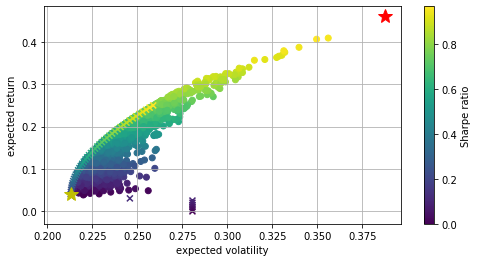

In [37]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets,
            c=prets / pvols, marker='o')
            # random portfolio composition
plt.scatter(tvols, trets,
            c=trets / tvols, marker='x')
            # efficient frontier
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
         'r*', markersize=15.0)
            # portfolio with highest Sharpe ratio
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],
         'y*', markersize=15.0)
            # minimum variance portfolio
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [38]:
#资本市场线
import scipy.interpolate as sci

ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

tck = sci.splrep(evols, erets)

def f(x):
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)
def df(x):
    ''' First derivative of efficient frontier function. '''
    return sci.splev(x, tck, der=1)

def equations(p, rf=0.01):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

opt = sco.fsolve(equations, [0.01, 0.5, 0.15])

opt

array([0.01      , 1.07417652, 0.30562936])

In [39]:
np.round(equations(opt), 6)

array([ 0., -0.,  0.])

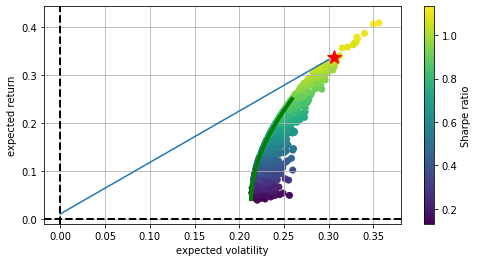

In [40]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets,
            c=(prets - 0.01) / pvols, marker='o')
            # random portfolio composition
plt.plot(evols, erets, 'g', lw=4.0)
            # efficient frontier
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, lw=1.5)
            # capital market line
plt.plot(opt[2], f(opt[2]), 'r*', markersize=15.0) 
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')


In [41]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - f(opt[2])},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

res['x'].round(3)

array([0.649, 0.   , 0.351, 0.   ])

# lesson08

In [1]:
#协方差矩阵
import numpy as np
X = [[2, 0, -1.4],
[2.2, 0.2, -1.5],
[2.4, 0.1, -1],
[1.9, 0, -1.2]]
print(np.cov(np.array(X).T))

[[ 0.04916667  0.01416667  0.01916667]
 [ 0.01416667  0.00916667 -0.00583333]
 [ 0.01916667 -0.00583333  0.04916667]]


In [2]:
#特征值与特征向量
w, v = np.linalg.eig(np.array([[1, -2], [2, -3]]))
print('特征值：{}\n特征向量：{}'.format(w,v))

特征值：[-0.99999998 -1.00000002]
特征向量：[[0.70710678 0.70710678]
 [0.70710678 0.70710678]]


In [3]:
#使用PCA降维
import pandas as pd
x1=[0.9,2.4,1.2,0.5,0.3,1.8,0.5,0.3,2.5,1.3]
x2=[1,2.6,1.7,0.7,0.7,1.4,0.6,0.6,2.6,1.1]
data=pd.DataFrame([x1,x2],index=['x1','x2'])


data_new=(data.T-np.mean(data,axis=1)).T

a, b = np.linalg.eig(np.cov(data_new))

np.dot(data_new.T,b[:,0])


array([-0.40200434,  1.78596968,  0.29427599, -0.89923557, -1.04573848,
        0.5295593 , -0.96731071, -1.11381362,  1.85922114, -0.04092339])

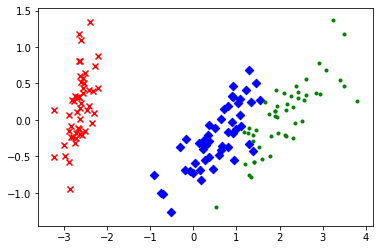

In [4]:
#鸢尾花数据集的降维
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

data = load_iris()
y = data.target
X = data.data
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X)

red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []
for i in range(len(reduced_X)):
    if y[i] == 0:
        red_x.append(reduced_X[i][0])
        red_y.append(reduced_X[i][1])
    elif y[i] == 1:
        blue_x.append(reduced_X[i][0])
        blue_y.append(reduced_X[i][1])
    else:
        green_x.append(reduced_X[i][0])
        green_y.append(reduced_X[i][1])
plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='D')
plt.scatter(green_x, green_y, c='g', marker='.')
plt.show()

In [6]:
###构造PCA指数
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
import pandas_datareader.data as web

symbols = ['ADS.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE',
           'BMW.DE', 'CBK.DE', 'CON.DE', 'DAI.DE', 'DB1.DE',
           'DBK.DE', 'DPW.DE', 'DTE.DE', 'EOAN.DE', 'FME.DE',
           'FRE.DE', 'HEI.DE', 'HEN3.DE', 'IFX.DE', 'LHA.DE',
           'LIN.DE', 'LXS.DE', 'MRK.DE', 'MUV2.DE', 'RWE.DE',
           'SAP.DE', 'SDF.DE', 'SIE.DE', 'TKA.DE', 'VOW3.DE',
           '^GDAXI']
data = pd.DataFrame()

for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='yahoo')['Close']
data = data.dropna()  

In [7]:
data.head()

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BEI.DE,BMW.DE,CBK.DE,CON.DE,DAI.DE,DB1.DE,...,LXS.DE,MRK.DE,MUV2.DE,RWE.DE,SAP.DE,SDF.DE,SIE.DE,TKA.DE,VOW3.DE,^GDAXI
Date,,,,,,,,,,,,,,,,,,,,,
2012-06-18,57.840000,73.879997,56.099998,52.471901,52.740002,57.139999,13.57,64.930000,34.740002,40.000000,...,50.310001,38.764999,103.750000,29.540001,46.695000,31.375000,64.159500,12.200,124.650002,6248.200195
2012-06-19,59.110001,75.000000,57.189999,53.918598,53.520000,57.930000,14.05,66.800003,35.395000,40.529999,...,52.070000,39.610001,105.699997,30.170000,47.680000,31.840000,65.070396,12.400,126.400002,6363.359863
2012-06-20,58.990002,76.000000,56.869999,53.269100,52.669998,58.070000,14.16,68.150002,35.540001,40.685001,...,53.099998,39.154999,106.650002,31.190001,47.665001,32.849998,65.312599,12.835,127.599998,6392.129883
2012-06-21,57.930000,76.360001,56.349998,53.338001,52.310001,57.580002,14.06,67.000000,35.070000,39.889999,...,51.610001,38.974998,106.199997,30.840000,46.400002,32.285000,64.624603,12.945,123.699997,6343.129883
2012-06-22,56.990002,75.750000,54.090000,52.029099,51.860001,56.470001,13.98,64.620003,34.855000,40.044998,...,49.099998,38.685001,105.699997,30.930000,45.735001,32.049999,63.665298,12.685,121.150002,6263.250000


In [8]:
dax = pd.DataFrame(data.pop('^GDAXI'))           

data[data.columns[:6]].head()

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BEI.DE,BMW.DE
Date,,,,,,
2012-06-18,57.840000,73.879997,56.099998,52.471901,52.740002,57.139999
2012-06-19,59.110001,75.000000,57.189999,53.918598,53.520000,57.930000
2012-06-20,58.990002,76.000000,56.869999,53.269100,52.669998,58.070000
2012-06-21,57.930000,76.360001,56.349998,53.338001,52.310001,57.580002
2012-06-22,56.990002,75.750000,54.090000,52.029099,51.860001,56.470001


In [9]:
scale_function = lambda x: (x - x.mean()) / x.std()

pca = KernelPCA().fit(data.apply(scale_function))

len(pca.lambdas_)

1033

In [10]:
pca.lambdas_[:10].round()

array([28192., 15055.,  5621.,  3901.,  1505.,  1231.,   682.,   417.,
         313.,   265.])

In [11]:
get_we = lambda x: x / x.sum()

get_we(pca.lambdas_)[:10]

array([0.47994781, 0.25630464, 0.0956944 , 0.0664041 , 0.02561598,
       0.02095892, 0.01160816, 0.0071007 , 0.00533529, 0.00451279])

In [12]:
get_we(pca.lambdas_)[:5].sum()

0.9239669392407028

array([734672., 734673., 734674., ..., 737502., 737503., 737504.])

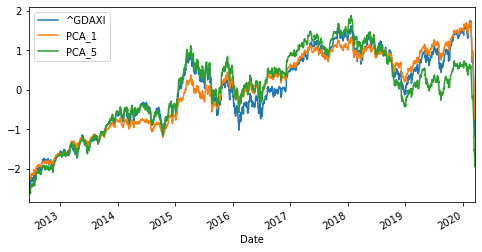

In [13]:
pca = KernelPCA(n_components=1).fit(data.apply(scale_function))
dax['PCA_1'] = pca.transform(-data)

import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
dax.apply(scale_function).plot(figsize=(8, 4))



pca = KernelPCA(n_components=5).fit(data.apply(scale_function))
pca_components = pca.transform(-data)
weights = get_we(pca.lambdas_)
dax['PCA_5'] = np.dot(pca_components, weights)

import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
dax.apply(scale_function).plot(figsize=(8, 4))

import matplotlib as mpl
mpl_dates = mpl.dates.date2num(data.index.to_pydatetime())
mpl_dates

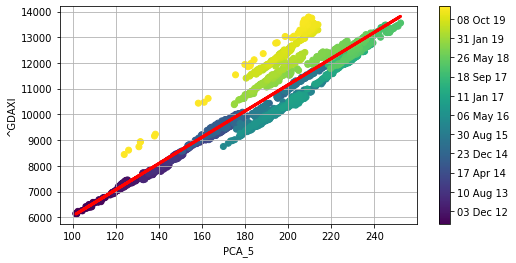

In [14]:
plt.figure(figsize=(8, 4))
plt.scatter(dax['PCA_5'], dax['^GDAXI'], c=mpl_dates)
lin_reg = np.polyval(np.polyfit(dax['PCA_5'],
                                dax['^GDAXI'], 1),
                                dax['PCA_5'])
plt.plot(dax['PCA_5'], lin_reg, 'r', lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
                format=mpl.dates.DateFormatter('%d %b %y'))

In [17]:
dax.index 

DatetimeIndex(['2012-06-18', '2012-06-19', '2012-06-20', '2012-06-21',
               '2012-06-22', '2012-06-25', '2012-06-26', '2012-06-27',
               '2012-06-28', '2012-06-29',
               ...
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-16', '2020-03-17', '2020-03-18',
               '2020-03-19', '2020-03-20'],
              dtype='datetime64[ns]', name='Date', length=1959, freq=None)

In [20]:
cut_date = '2015/7/1'
early_pca = dax[dax.index < cut_date]['PCA_5']
early_reg = np.polyval(np.polyfit(early_pca,
                dax['^GDAXI'][dax.index < cut_date], 1),
                early_pca)

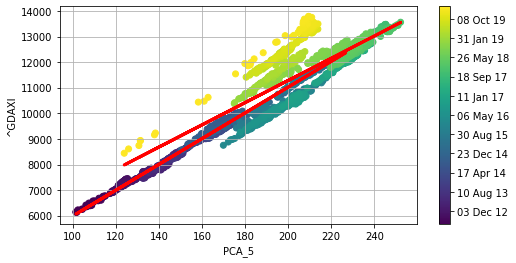

In [21]:


late_pca = dax[dax.index >= cut_date]['PCA_5']
late_reg = np.polyval(np.polyfit(late_pca,
                dax['^GDAXI'][dax.index >= cut_date], 1),
                late_pca)


plt.figure(figsize=(8, 4))
plt.scatter(dax['PCA_5'], dax['^GDAXI'], c=mpl_dates)
plt.plot(early_pca, early_reg, 'r', lw=3)
plt.plot(late_pca, late_reg, 'r', lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
                format=mpl.dates.DateFormatter('%d %b %y'))                


## hw08

In [22]:
###构造PCA指数
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA

In [44]:
dji = pd.read_csv('data/DJI.csv', index_col=0)
dji.index = pd.to_datetime(dji.index)
dji.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2011-05-25,12355.45,12462.28,12271.90,12394.66,4.109670e+09,12394.66
2011-05-24,12381.87,12465.80,12315.42,12356.21,3.846250e+09,12356.21
2011-05-23,12511.29,12511.29,12292.49,12381.26,3.255580e+09,12381.26
2011-05-20,12604.64,12630.11,12453.96,12512.04,4.066020e+09,12512.04
2011-05-19,12561.46,12673.78,12506.67,12605.32,3.626110e+09,12605.32


In [45]:
dji = dji[['Close']]

In [47]:
data = pd.read_csv('data/stock_dji.csv', index_col=0)
data.index = pd.to_datetime(data.index)
data.head()

,ADC,AFL,ARKR,AZPN,CLFD,DTE,ENDP,FLWS,FR,GMXR,...,KSS,MTSC,NWN,ODFL,PARL,RELV,SIGM,STT,TRIB,UTR
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-02,17.70,23.78,8.15,17.10,3.19,42.37,11.54,15.77,31.16,4.50,...,70.23,10.03,26.20,13.40,1.92,1.30,1.75,52.11,1.50,39.34
2002-01-03,16.14,23.52,8.15,17.41,3.27,42.14,11.48,17.40,31.45,4.37,...,69.65,10.85,26.25,13.00,1.94,1.22,2.11,52.90,1.55,39.49
2002-01-04,15.45,23.92,7.79,17.90,3.28,41.79,11.60,17.11,31.46,4.45,...,70.21,10.34,26.46,13.00,1.98,1.26,2.20,54.16,1.54,39.38
2002-01-07,16.59,23.12,7.79,17.49,3.50,41.48,11.90,17.38,31.10,4.38,...,70.17,9.99,26.84,13.32,1.94,1.28,2.11,55.14,1.55,38.55
2002-01-08,16.76,25.54,7.35,17.89,4.24,40.69,12.41,14.62,31.40,4.30,...,69.90,10.35,27.35,13.75,1.94,1.27,2.25,54.44,1.58,38.98


In [48]:
dji = dji[dji.index.isin(data.index)]

In [51]:
scale_function = lambda x: (x - x.mean()) / x.std()

pca = KernelPCA().fit(data.apply(scale_function))

len(pca.lambdas_)

1182

In [52]:
pca.lambdas_[:10].round()

array([22313., 11749.,  6280.,  4854.,  2700.,  1760.,  1548.,  1283.,
         927.,   654.])

In [53]:
get_we = lambda x: x / x.sum()

get_we(pca.lambdas_)[:10]

array([0.39311873, 0.20699252, 0.11063253, 0.08551697, 0.04757328,
       0.03101474, 0.02727377, 0.0226123 , 0.01632884, 0.01151754])

In [54]:
get_we(pca.lambdas_)[:5].sum()

0.8438340298948123

array([730852., 730853., 730854., ..., 734280., 734281., 734282.])

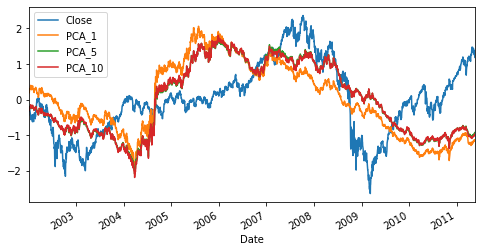

In [57]:
pca = KernelPCA(n_components=1).fit(data.apply(scale_function))
dji['PCA_1'] = pca.transform(-data)

import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
dji.apply(scale_function).plot(figsize=(8, 4))



pca = KernelPCA(n_components=5).fit(data.apply(scale_function))
pca_components = pca.transform(-data)
weights = get_we(pca.lambdas_)
dji['PCA_5'] = np.dot(pca_components, weights)

pca = KernelPCA(n_components=10).fit(data.apply(scale_function))
pca_components = pca.transform(-data)
weights = get_we(pca.lambdas_)
dji['PCA_10'] = np.dot(pca_components, weights)

import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
dji.apply(scale_function).plot(figsize=(8, 4))

import matplotlib as mpl
mpl_dates = mpl.dates.date2num(data.index.to_pydatetime())
mpl_dates

# lesson09

In [1]:
# !pip install pymc3
!pip freeze | grep pymc3

pymc3==3.8


In [2]:
import warnings
warnings.simplefilter('ignore')
import pymc3 as pm
import numpy as np
np.random.seed(1000)
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')


Text(0, 0.5, 'y')

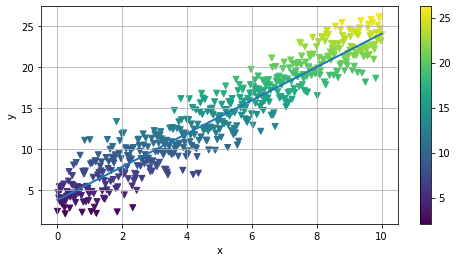

In [3]:
#构造数据
x = np.linspace(0, 10, 500)
y = 4 + 2 * x + np.random.standard_normal(len(x)) * 2

#最小二乘回归
reg = np.polyfit(x, y, 1)

plt.figure(figsize=(8, 4))
plt.scatter(x, y, c=y, marker='v')
plt.plot(x, reg[1] + reg[0] * x, lw=2.0)
plt.colorbar()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

In [4]:
reg

array([2.03384161, 3.77649234])

In [5]:
#贝叶斯回归
with pm.Model() as model: 
    # 定义参数的先验概率
    alpha = pm.Normal('alpha', mu=0, sd=20)
    beta = pm.Normal('beta', mu=0, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    # 定义线性回归方差
    y_est = alpha + beta * x
    
    # 定义极大似然度
    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=y)
    
    # 寻找初始值
    start = pm.find_MAP()
    print(type(start))
    print(start)
    # 计算步长
    step = pm.NUTS()
    # 采样。样本容量为100
    trace = pm.sample(100, step, start=start, progressbar=False)
 
#观测来自第一个样本的估算   
trace[0]

logp = -1,068.5, ||grad|| = 60.625: 100%|██████████| 28/28 [00:00<00:00, 2197.94it/s]  


<class 'dict'>
{'alpha': array(3.77621512), 'beta': array(2.03388193), 'sigma_interval__': array(-1.38569014), 'sigma': array(2.00096693)}


Only 100 samples in chain.
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]
The number of effective samples is smaller than 25% for some parameters.


{'alpha': 3.817464697550698,
 'beta': 2.026153322495376,
 'sigma_interval__': -1.4039812970460936,
 'sigma': 1.9718509972125116}

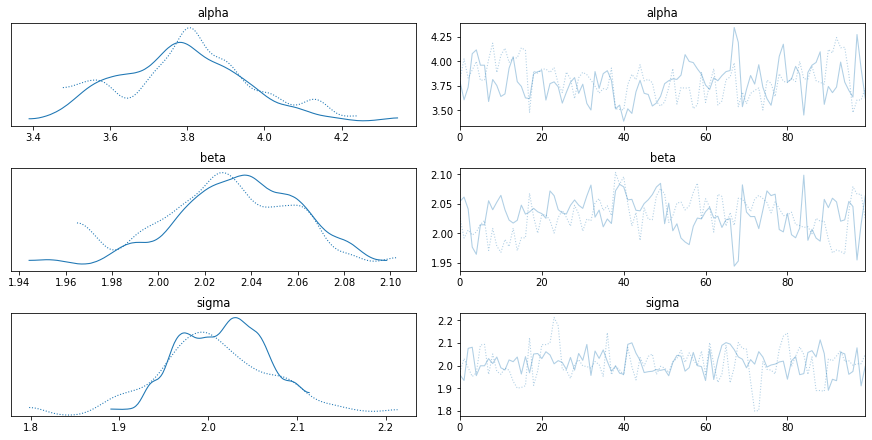

<Figure size 576x576 with 0 Axes>

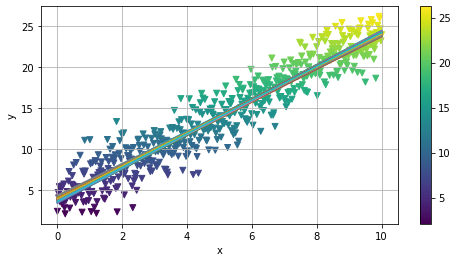

In [6]:
fig = pm.traceplot(trace, lines={'alpha': 4, 'beta': 2, 'sigma': 2})
plt.figure(figsize=(8, 8))


plt.figure(figsize=(8, 4))
plt.scatter(x, y, c=y, marker='v')
plt.colorbar()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
for i in range(len(trace)):
    plt.plot(x, trace['alpha'][i] + trace['beta'][i] * x)

In [11]:
#真实数据
import warnings
warnings.simplefilter('ignore')
# import zipline
import pandas as pd
import pytz
import datetime as dt  

In [12]:
data = pd.read_excel('data/ex09.xlsx')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Mon        717 non-null    int64  
 1   Day        717 non-null    int64  
 2   Year       717 non-null    int64  
 3   gas        717 non-null    float64
 4   crude oil  717 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 28.1 KB


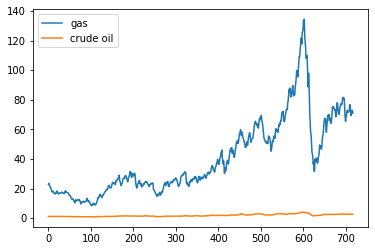

In [14]:
data[['gas', 'crude oil']].plot()

In [16]:
#收益率
data[['gas', 'crude oil']].iloc[-1] / data[['gas', 'crude oil']].iloc[0] - 1

gas          2.105240
crude oil    1.199184
dtype: float64

In [17]:
#相关系数
data[['gas', 'crude oil']].corr()

,gas,crude oil
gas,1.000000,0.977157
crude oil,0.977157,1.000000


In [21]:
import matplotlib as mpl


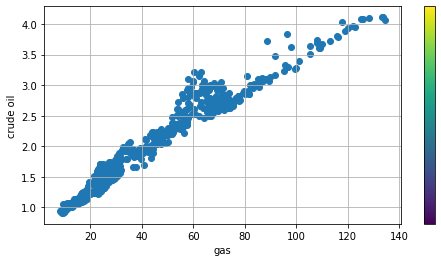

In [22]:
plt.figure(figsize=(8, 4))
plt.scatter(data['gas'], data['crude oil'], marker='o')
plt.grid(True)
plt.xlabel('gas')
plt.ylabel('crude oil')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
             format=mpl.dates.DateFormatter('%d %b %y'))

logp = 293.56, ||grad|| = 45.724: 100%|██████████| 47/47 [00:00<00:00, 1867.99it/s]        
Only 100 samples in chain.
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]


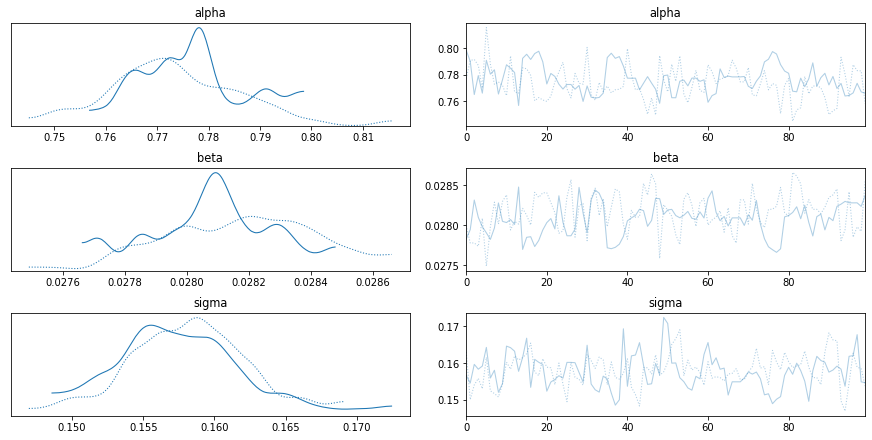

In [25]:
#贝叶斯回归             
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=20)
    beta = pm.Normal('beta', mu=0, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    
    y_est = alpha + beta * data['gas'].values
    
    likelihood = pm.Normal('crude oil', mu=y_est, sd=sigma,
                           observed=data['crude oil'].values)
    
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(100, step, start=start, progressbar=False)

fig = pm.traceplot(trace)

<Figure size 576x576 with 0 Axes>

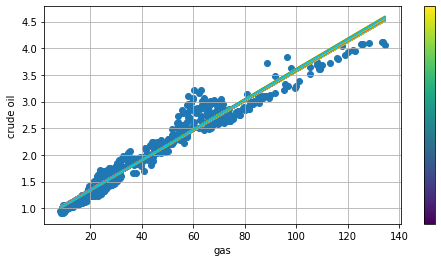

In [27]:
plt.figure(figsize=(8, 8))

plt.figure(figsize=(8, 4))
plt.scatter(data['gas'], data['crude oil'], marker='o')
plt.grid(True)
plt.xlabel('gas')
plt.ylabel('crude oil')
for i in range(len(trace)):
    plt.plot(data['gas'], trace['alpha'][i] + trace['beta'][i] * data['gas'])
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
             format=mpl.dates.DateFormatter('%d %b %y'))

# lesson10

## 假设A（0）=100；A(1)=112；S(0)=34。现有一份远期合约，其中股票的远期价格F=38.6，交割日为时间点1.问能否找到套利机会 

有套利机会。

假设在时间点0借3400买入100份股票，到时间点1卖出价为3860，还了本金和利息34*112=3808，获利52元。

## 完成以下期货支付流

假设保证金为期货价格的10%，补仓保证金为期货价格的5% 

 n|f(n,T)|现金流|保证金1|支付|保证金2 
 -|-|-|-|-|-
 0|150|开仓|0|-15|15
 1|140|-10|5|-9|14
 2|138|-2|12|0|12
 3|148|10|22|+7.2|14.8
 4|160|12|26.8|+10.8|16

# lesson11

## hw10
模拟生成几何布朗运动、扩散跳跃、平方跟扩散的随机过程

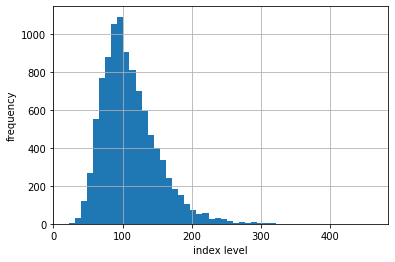

In [4]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import scipy.stats as scs

##几何布朗运动
I = 10000
M = 50
sigma = 0.25 
S0 = 100
T = 2.0
r = 0.05
dt = T / M
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
            + sigma * np.sqrt(dt) * npr.standard_normal(I))
    
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)
plt.show()

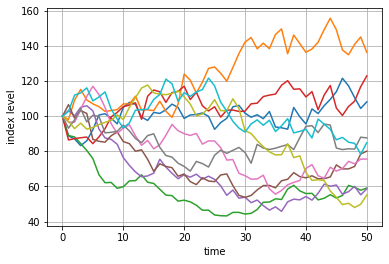

In [5]:
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)
plt.show()

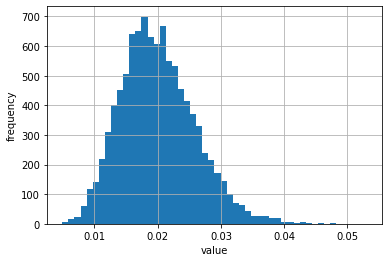

In [6]:
##平方扩散
x0 = 0.05
kappa = 3.0
theta = 0.02
sigma = 0.1

I = 10000
M = 50
dt = T / M
def srd_euler():
    xh = np.zeros((M + 1, I))
    x1 = np.zeros_like(xh)
    xh[0] = x0
    x1[0] = x0
    for t in range(1, M + 1):
        xh[t] = (xh[t - 1]
              + kappa * (theta - np.maximum(xh[t - 1], 0)) * dt
              + sigma * np.sqrt(np.maximum(xh[t - 1], 0)) * np.sqrt(dt)  
              * npr.standard_normal(I))
    x1 = np.maximum(xh, 0)
    return x1
x1 = srd_euler()

plt.hist(x1[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)
plt.show()

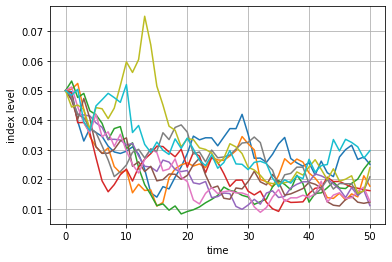

In [7]:
plt.plot(x1[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)
plt.show()

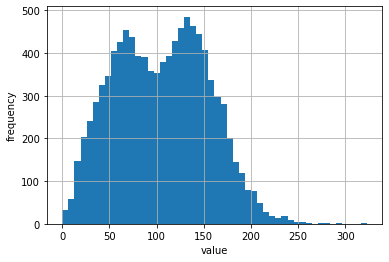

In [8]:
##跳跃扩散
S0 = 100.
r = 0.05
sigma = 0.2
lamb = 0.75
mu = -0.6
delta = 0.25
T = 1.0

M = 50
I = 10000
dt = T / M
rj = lamb * (np.exp(mu + 0.5 * delta ** 2) - 1)
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I))
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt
                       + sigma * np.sqrt(dt) * sn1[t])
                       + (np.exp(mu + delta * sn2[t]) - 1)
                       * poi[t])
    S[t] = np.maximum(S[t], 0)
    
plt.hist(S[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)  
plt.show()  

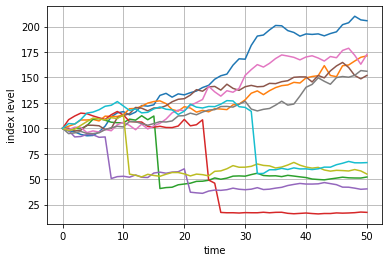

In [9]:
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)
plt.show()